<a href="https://colab.research.google.com/github/mihika632/DS_ML/blob/main/models_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U ydata-profiling pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.3 MB/s eta 0:00:00
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.46.0 requires numba, which is not installed.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


In [3]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

# Get the uploaded filename
file_path = list(uploaded.keys())[0]

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


Saving site_104_data.csv to site_104_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21601 entries, 0 to 21600
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt_time   21601 non-null  object 
 1   pm10cnc   18460 non-null  float64
 2   pm2.5cnc  18907 non-null  float64
 3   deviceid  21601 non-null  object 
dtypes: float64(2), object(2)
memory usage: 675.2+ KB


dt_time  pm10cnc  pm2.5cnc  deviceid
0  2022-08-31 00:00:00   116.82     43.47  site_104
1  2022-08-31 01:00:00    80.59     40.35  site_104
2  2022-08-31 02:00:00    79.75     32.95  site_104
3  2022-08-31 03:00:00    68.85     30.65  site_104
4  2022-08-31 04:00:00    73.90     64.72  site_104

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values


pm10cnc     3141
pm2.5cnc    2694
dtype: int64

In [8]:
df.dropna(inplace=True)  # Drop rows with missing values


In [9]:
profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
report_filename = "data_profile_report.html"
profile.to_file(report_filename)

# Step 7: Download the report to your local PC
files.download(report_filename)

print("✅ Report generated and downloaded successfully!")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Report generated and downloaded successfully!


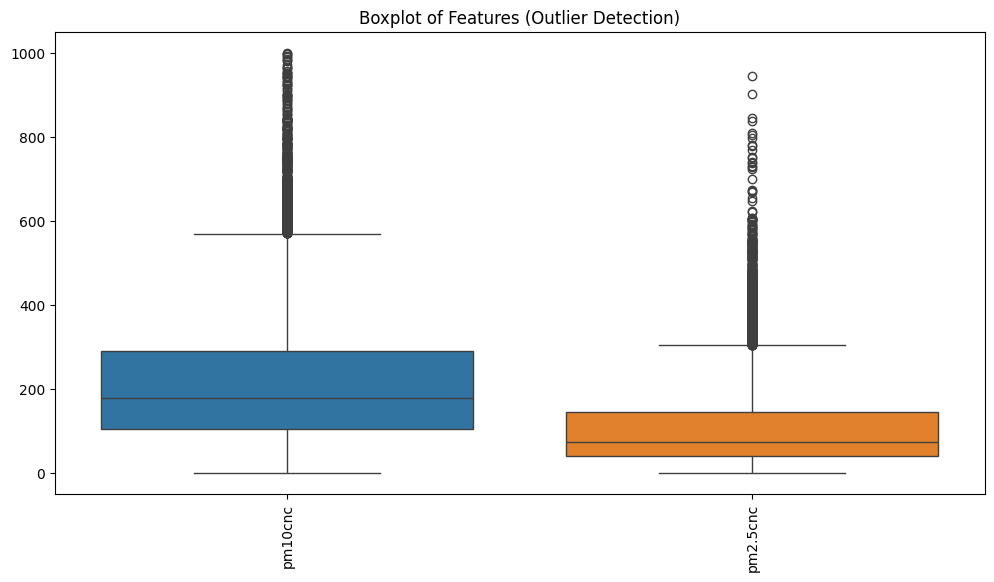

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()


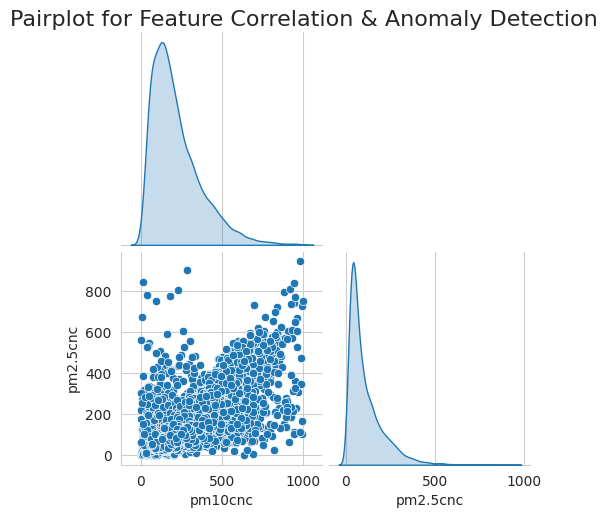

ValueError: could not convert string to float: '2022-08-31 00:00:00'

<Figure size 1200x600 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Set Seaborn Style for Better Aesthetics
sns.set_style("whitegrid")

# 🔹 Pairplot: Shows Scatter, KDE, and Correlations (Best for Outliers & Trends)
sns.pairplot(df, diag_kind="kde", corner=True)  # `corner=True` removes duplicate plots
plt.suptitle("Pairplot for Feature Correlation & Anomaly Detection", fontsize=16, y=1.02)
plt.show()

# 🔹 Heatmap for Feature Correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


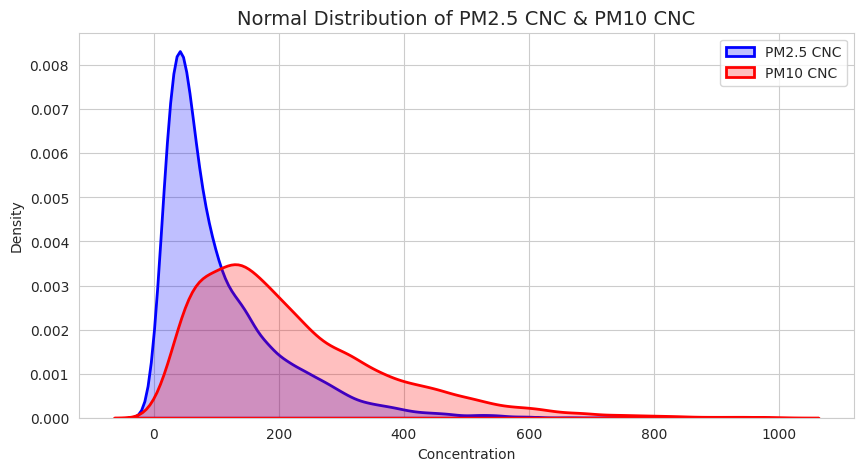

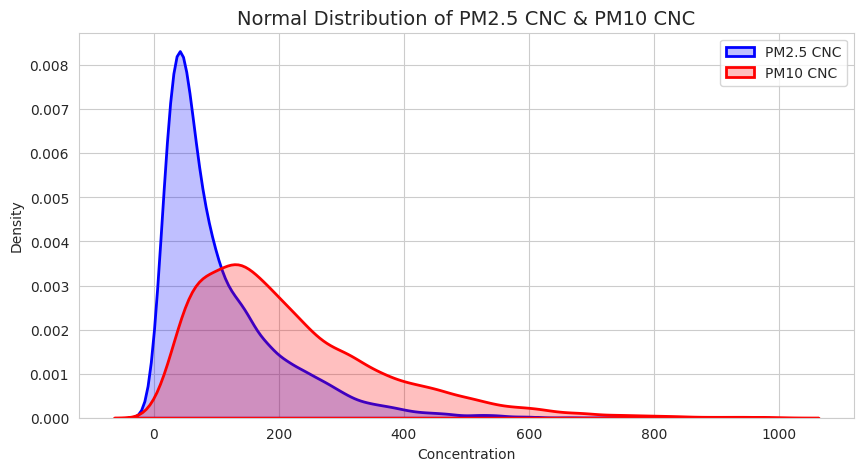

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Create the KDE plot for both columns
plt.figure(figsize=(10, 5))
sns.kdeplot(df["pm2.5cnc"], fill=True, color="blue", label="PM2.5 CNC", linewidth=2)
sns.kdeplot(df["pm10cnc"], fill=True, color="red", label="PM10 CNC", linewidth=2)

# Add a title and labels
plt.title("Normal Distribution of PM2.5 CNC & PM10 CNC", fontsize=14)
plt.xlabel("Concentration")
plt.ylabel("Density")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


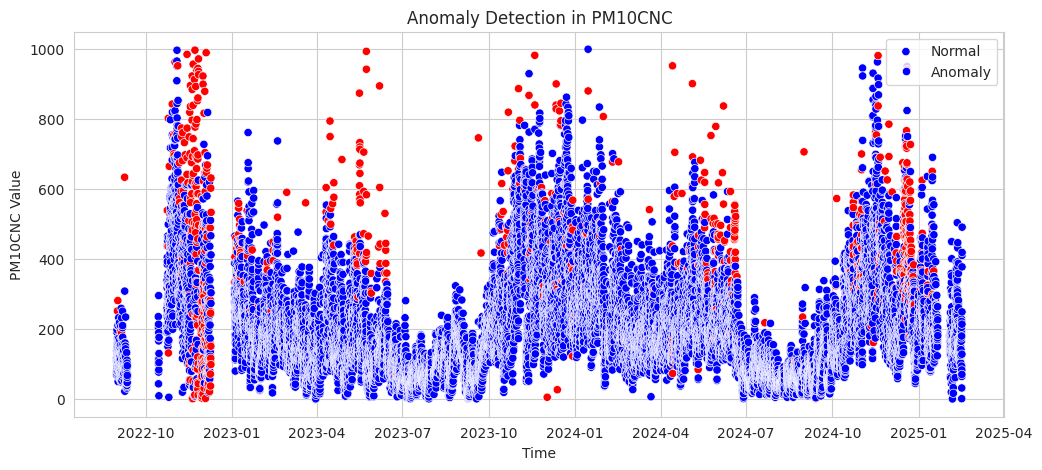

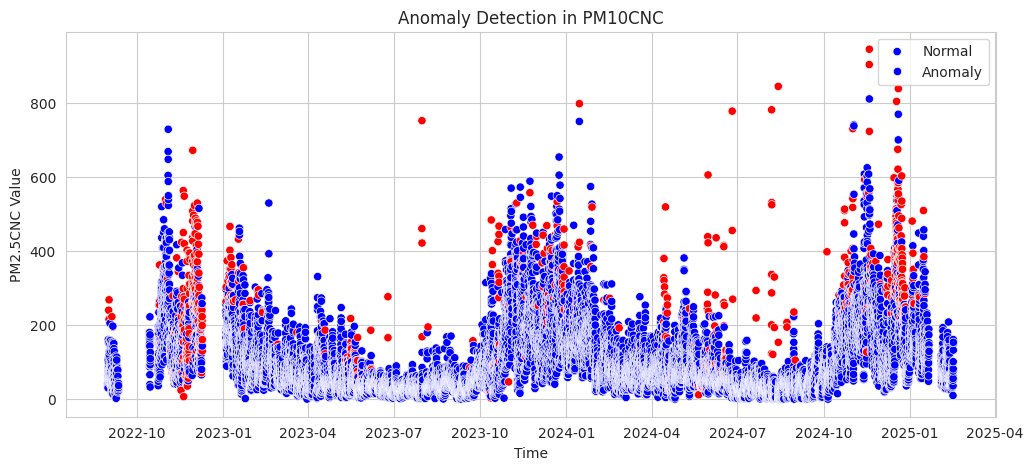

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df["dt_time"] = pd.to_datetime(df["dt_time"])

# 📌 Handle missing values (Drop them for now)
df = df.dropna(subset=["pm10cnc", "pm2.5cnc"])

# 📌 Select only numeric columns for training
X = df[["pm10cnc", "pm2.5cnc"]]

# 📌 Normalize data (Autoencoders work better with scaled inputs)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Define the Autoencoder model
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Compress to 2D space

model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')

# 📌 Train the Autoencoder
history = model.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# 📌 Compute reconstruction error
X_pred = model.predict(X_scaled)
mse = np.mean(np.abs(X_scaled - X_pred), axis=1)

# 📌 Set anomaly threshold (e.g., 95th percentile)
threshold = np.percentile(mse, 95)

# 📌 Detect anomalies
df["Anomaly_Score"] = mse
df["Anomaly"] = df["Anomaly_Score"] > threshold

# 📌 Plot anomalies
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm10cnc"], hue=df["Anomaly"], palette={False: "blue", True: "red"})
plt.title("Anomaly Detection in PM10CNC")
plt.xlabel("Time")
plt.ylabel("PM10CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()


plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm2.5cnc"], hue=df["Anomaly"], palette={False: "blue", True: "red"})
plt.title("Anomaly Detection in PM10CNC")
plt.xlabel("Time")
plt.ylabel("PM2.5CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()



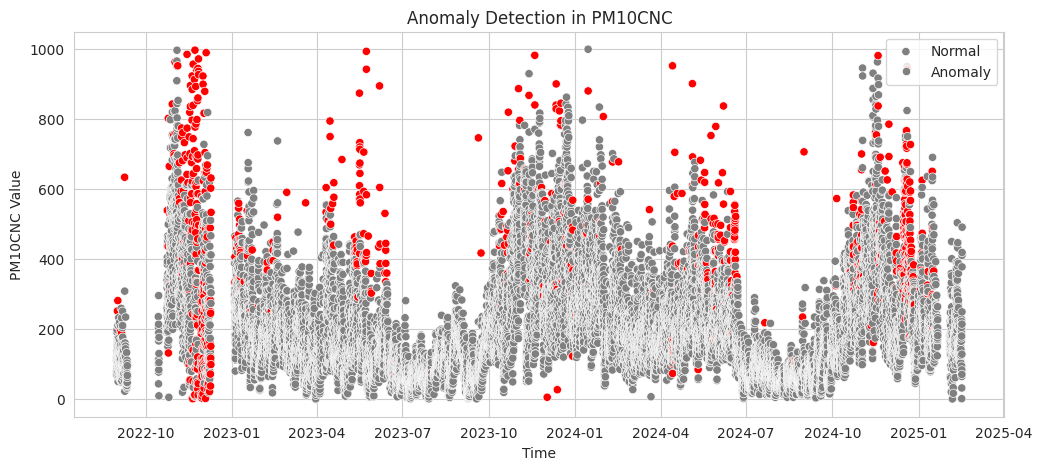

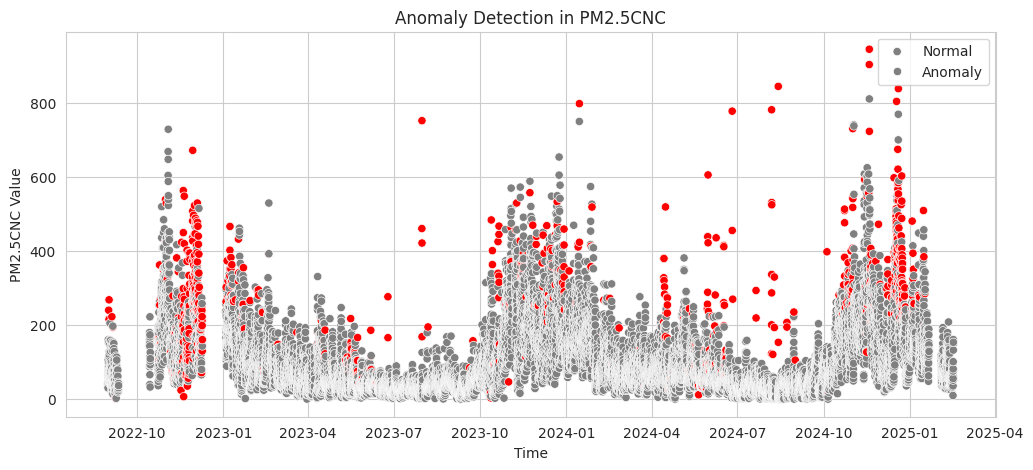

In [30]:
# prompt: just plot the anamolies red, leave the red to grey

# ... (Your existing code)

# 📌 Plot anomalies
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm10cnc"], hue=df["Anomaly"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM10CNC")
plt.xlabel("Time")
plt.ylabel("PM10CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()


plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm2.5cnc"], hue=df["Anomaly"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM2.5CNC") # Corrected the title
plt.xlabel("Time")
plt.ylabel("PM2.5CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()


In [43]:
from sklearn.cluster import DBSCAN

# 📌 Define a list of epsilon values from 0.1 to 1.5
eps_values = [round(i, 1) for i in np.arange(0.1, 1.6, 0.1)]

# 📌 Dictionary to store cluster results for each epsilon
dbscan_results = {}

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=15)  # Adjust min_samples as needed
    df[f'DBSCAN_Cluster_eps_{eps}'] = dbscan.fit_predict(X_scaled)
    dbscan_results[eps] = df[f'DBSCAN_Cluster_eps_{eps}']

# 📌 Display cluster assignments for different epsilon values
print(df[[f'DBSCAN_Cluster_eps_{eps}' for eps in eps_values]].head())


   DBSCAN_Cluster_eps_0.1  DBSCAN_Cluster_eps_0.2  DBSCAN_Cluster_eps_0.3  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   DBSCAN_Cluster_eps_0.4  DBSCAN_Cluster_eps_0.5  DBSCAN_Cluster_eps_0.6  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   DBSCAN_Cluster_eps_0.7  DBSCAN_Cluster_eps_0.8  DBSCAN_Cluster_eps_0.9 

In [34]:
# 📌 Calculate Accuracy
normal_count = len(df[df["Anomaly"] == False])
anomaly_count = len(df[df["Anomaly"] == True])

accuracy = normal_count / len(df) * 100
print(f"✅ Accuracy: {accuracy:.2f}%")
print(f"🔴 Number of Anomalies: {anomaly_count}")


✅ Accuracy: 95.00%
🔴 Number of Anomalies: 910


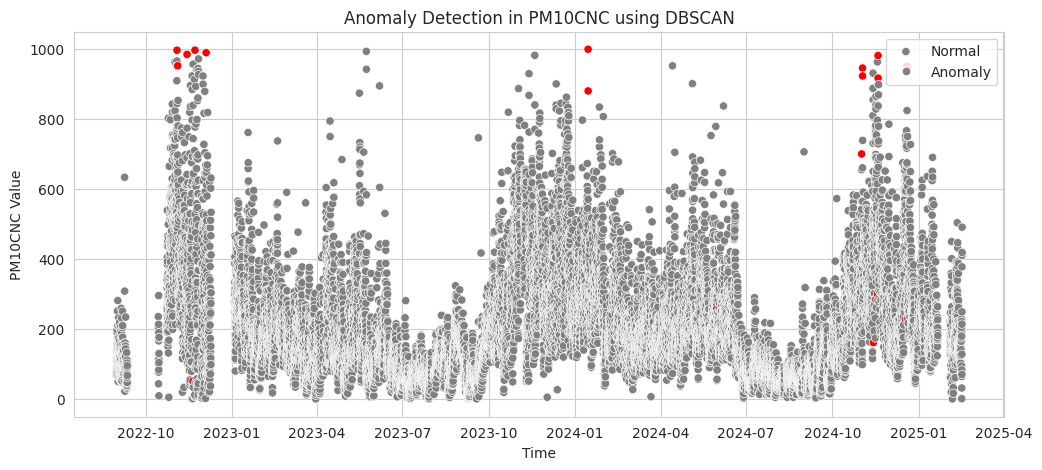

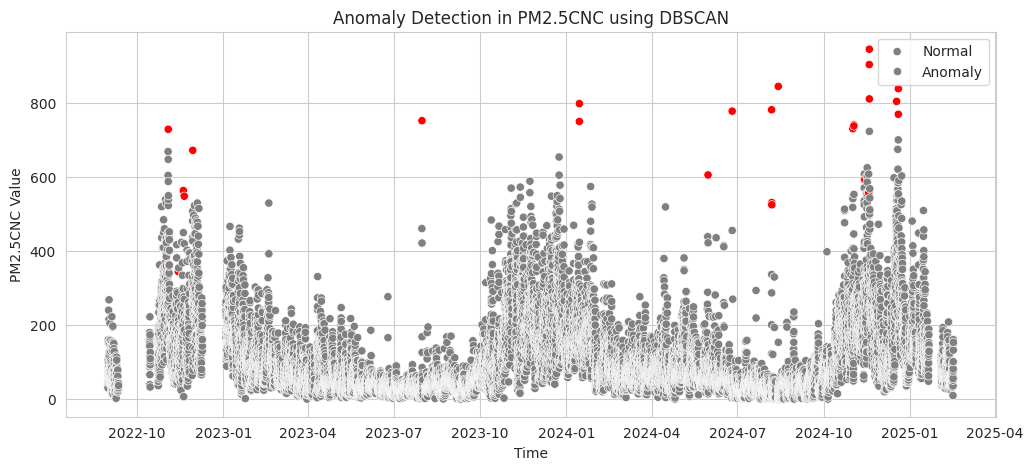

In [35]:
# prompt: can you repeat this same with dbscan?

from sklearn.cluster import DBSCAN

# ... (Your existing code)

# 📌 Select only numeric columns for training
X = df[["pm10cnc", "pm2.5cnc"]]

# 📌 Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=15) # Adjust eps and min_samples as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# 📌 Consider noise points (-1) as anomalies
df['Anomaly_DBSCAN'] = df['DBSCAN_Cluster'] == -1

# 📌 Plot anomalies detected by DBSCAN
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm10cnc"], hue=df["Anomaly_DBSCAN"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM10CNC using DBSCAN")
plt.xlabel("Time")
plt.ylabel("PM10CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm2.5cnc"], hue=df["Anomaly_DBSCAN"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM2.5CNC using DBSCAN")
plt.xlabel("Time")
plt.ylabel("PM2.5CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()


In [36]:
# prompt: also calculate the accuracy and number of anamolies in these case

# ... (Your existing code)

# 📌 Calculate Accuracy and Number of Anomalies for DBSCAN
normal_count_dbscan = len(df[df["Anomaly_DBSCAN"] == False])
anomaly_count_dbscan = len(df[df["Anomaly_DBSCAN"] == True])

accuracy_dbscan = normal_count_dbscan / len(df) * 100
print(f"✅ DBSCAN Accuracy: {accuracy_dbscan:.2f}%")
print(f"🔴 DBSCAN Number of Anomalies: {anomaly_count_dbscan}")


✅ DBSCAN Accuracy: 99.85%
🔴 DBSCAN Number of Anomalies: 28


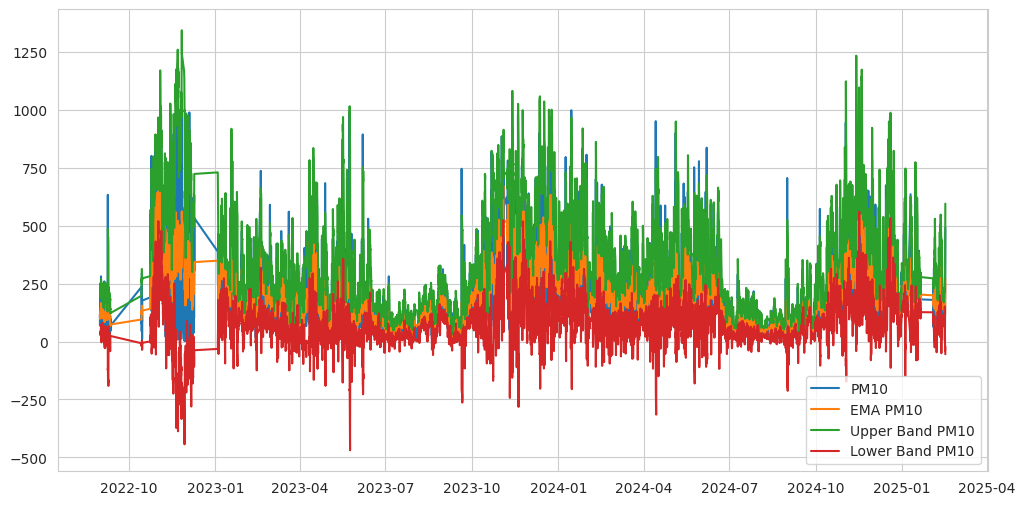

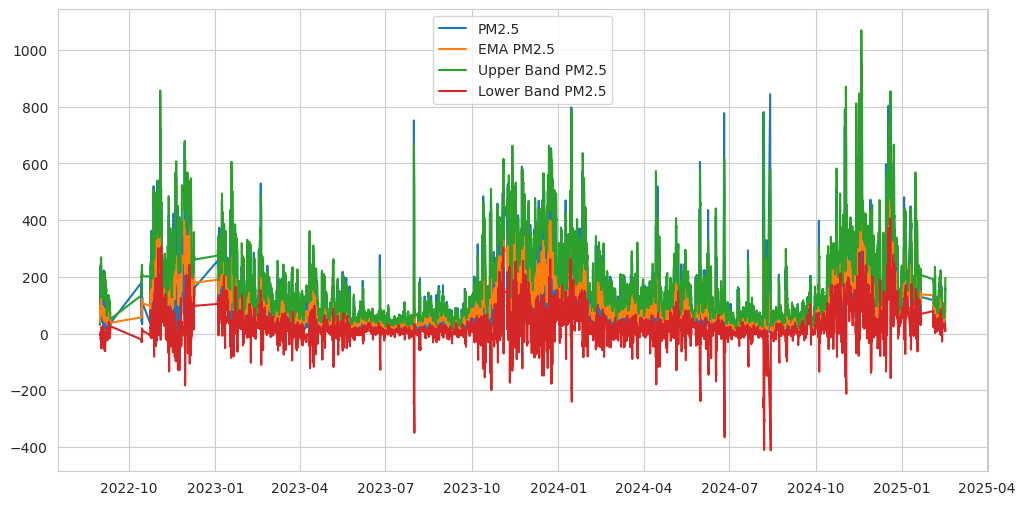

In [37]:
# prompt: repeat  the same using EMA+bollinger bands

import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'dt_time' column is datetime
# and you have 'pm10cnc' and 'pm2.5cnc' columns

# Calculate EMA
window_size = 14  # Example window size, adjust as needed
df['EMA_pm10'] = df['pm10cnc'].ewm(span=window_size, adjust=False).mean()
df['EMA_pm25'] = df['pm2.5cnc'].ewm(span=window_size, adjust=False).mean()

# Calculate Bollinger Bands
std_dev_multiplier = 2  # Example multiplier, adjust as needed
df['Upper_Band_pm10'] = df['EMA_pm10'] + std_dev_multiplier * df['pm10cnc'].rolling(window=window_size).std()
df['Lower_Band_pm10'] = df['EMA_pm10'] - std_dev_multiplier * df['pm10cnc'].rolling(window=window_size).std()
df['Upper_Band_pm25'] = df['EMA_pm25'] + std_dev_multiplier * df['pm2.5cnc'].rolling(window=window_size).std()
df['Lower_Band_pm25'] = df['EMA_pm25'] - std_dev_multiplier * df['pm2.5cnc'].rolling(window=window_size).std()


# Example: Identify anomalies based on Bollinger Bands
df['Anomaly_Bollinger_pm10'] = ((df['pm10cnc'] > df['Upper_Band_pm10']) | (df['pm10cnc'] < df['Lower_Band_pm10']))
df['Anomaly_Bollinger_pm25'] = ((df['pm2.5cnc'] > df['Upper_Band_pm25']) | (df['pm2.5cnc'] < df['Lower_Band_pm25']))

#Now you have new columns in your df for EMA and Bollinger Bands.
#You can visualize these or use them further in your analysis.
#For example, plot them alongside the original data:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['dt_time'], df['pm10cnc'], label='PM10')
plt.plot(df['dt_time'], df['EMA_pm10'], label='EMA PM10')
plt.plot(df['dt_time'], df['Upper_Band_pm10'], label='Upper Band PM10')
plt.plot(df['dt_time'], df['Lower_Band_pm10'], label='Lower Band PM10')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['dt_time'], df['pm2.5cnc'], label='PM2.5')
plt.plot(df['dt_time'], df['EMA_pm25'], label='EMA PM2.5')
plt.plot(df['dt_time'], df['Upper_Band_pm25'], label='Upper Band PM2.5')
plt.plot(df['dt_time'], df['Lower_Band_pm25'], label='Lower Band PM2.5')
plt.legend()
plt.show()


In [41]:
# prompt: pass a list of  7 diferent  window sizes also calculate the accuracy and number of anamolies in these case

def analyze_window_sizes(df, window_sizes):
    results = []
    for window_size in window_sizes:
        # Calculate EMA
        df['EMA_pm10'] = df['pm10cnc'].ewm(span=window_size, adjust=False).mean()
        df['EMA_pm25'] = df['pm2.5cnc'].ewm(span=window_size, adjust=False).mean()

        # Calculate Bollinger Bands
        std_dev_multiplier = 2
        df['Upper_Band_pm10'] = df['EMA_pm10'] + std_dev_multiplier * df['pm10cnc'].rolling(window=window_size).std()
        df['Lower_Band_pm10'] = df['EMA_pm10'] - std_dev_multiplier * df['pm10cnc'].rolling(window=window_size).std()
        df['Upper_Band_pm25'] = df['EMA_pm25'] + std_dev_multiplier * df['pm2.5cnc'].rolling(window=window_size).std()
        df['Lower_Band_pm25'] = df['EMA_pm25'] - std_dev_multiplier * df['pm2.5cnc'].rolling(window=window_size).std()

        # Identify anomalies based on Bollinger Bands
        df['Anomaly_Bollinger_pm10'] = ((df['pm10cnc'] > df['Upper_Band_pm10']) | (df['pm10cnc'] < df['Lower_Band_pm10']))
        df['Anomaly_Bollinger_pm25'] = ((df['pm2.5cnc'] > df['Upper_Band_pm25']) | (df['pm2.5cnc'] < df['Lower_Band_pm25']))

        # Combine anomalies
        df['Anomaly_Bollinger'] = df['Anomaly_Bollinger_pm10'] | df['Anomaly_Bollinger_pm25']

        # Calculate accuracy and anomaly count
        normal_count = len(df[df["Anomaly_Bollinger"] == False])
        anomaly_count = len(df[df["Anomaly_Bollinger"] == True])
        accuracy = (normal_count / len(df)) * 100

        results.append({
            'window_size': window_size,
            'accuracy': accuracy,
            'anomaly_count': anomaly_count
        })
    return results

# Example usage
window_sizes = [3, 4, 7, 14, 21, 28, 35, 42, 49]  # Your 7 different window sizes
analysis_results = analyze_window_sizes(df, window_sizes)

# Print or further process the analysis results
for result in analysis_results:
    print(f"Window Size: {result['window_size']}, Accuracy: {result['accuracy']:.2f}%, Anomalies: {result['anomaly_count']}")


Window Size: 3, Accuracy: 96.29%, Anomalies: 675
Window Size: 4, Accuracy: 97.98%, Anomalies: 368
Window Size: 7, Accuracy: 98.62%, Anomalies: 252
Window Size: 14, Accuracy: 93.74%, Anomalies: 1140
Window Size: 21, Accuracy: 92.81%, Anomalies: 1309
Window Size: 28, Accuracy: 92.40%, Anomalies: 1384
Window Size: 35, Accuracy: 92.21%, Anomalies: 1418
Window Size: 42, Accuracy: 92.07%, Anomalies: 1443
Window Size: 49, Accuracy: 91.86%, Anomalies: 1482


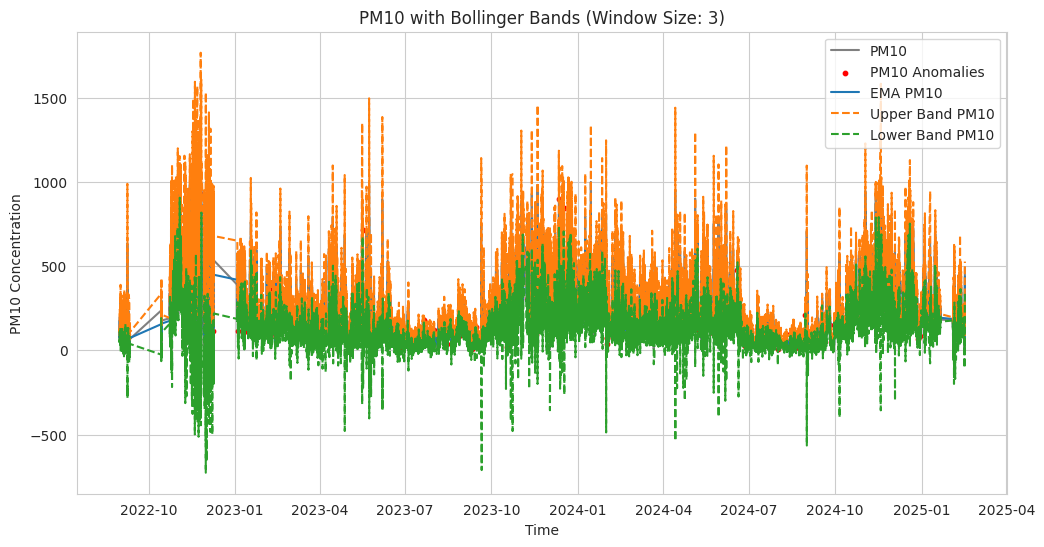

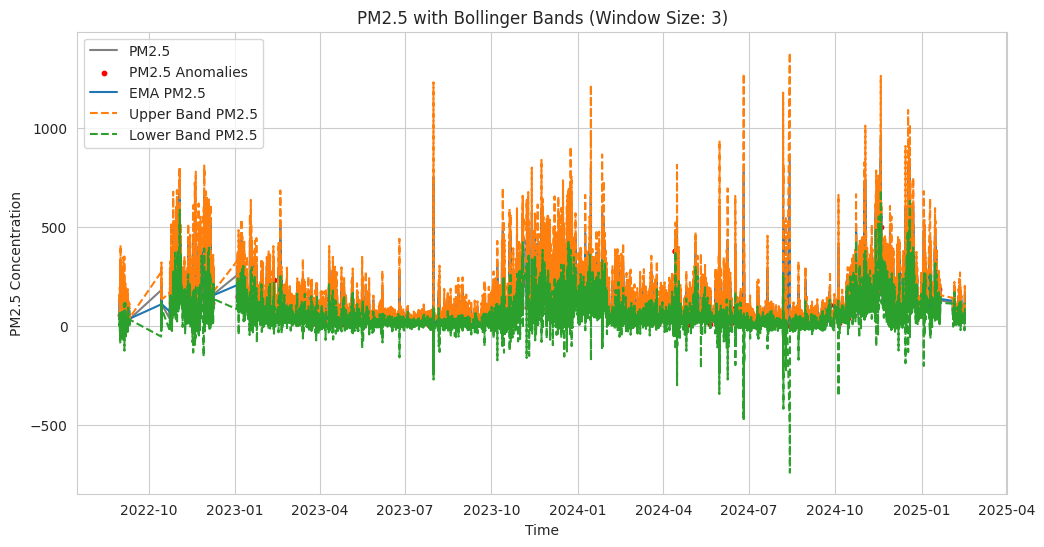

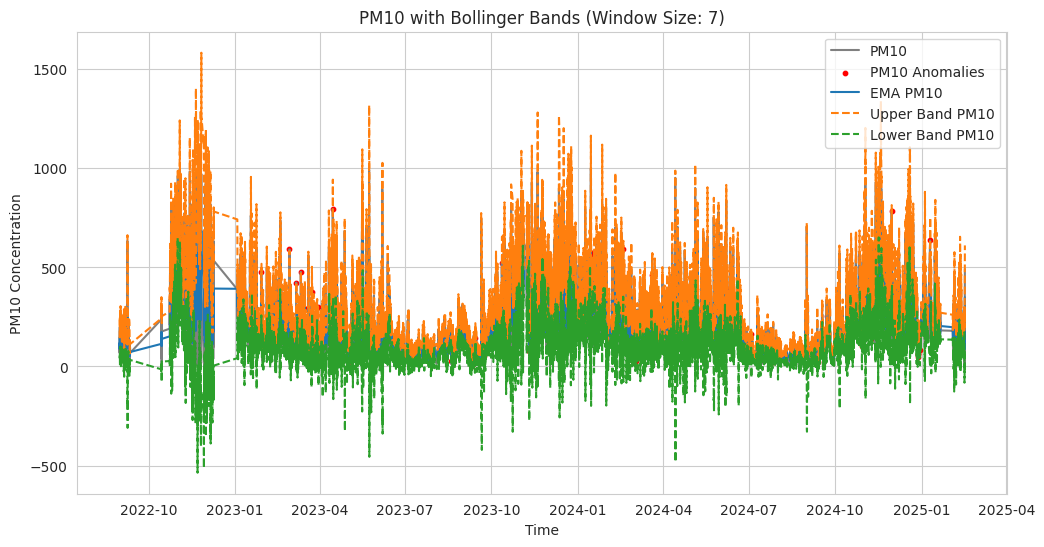

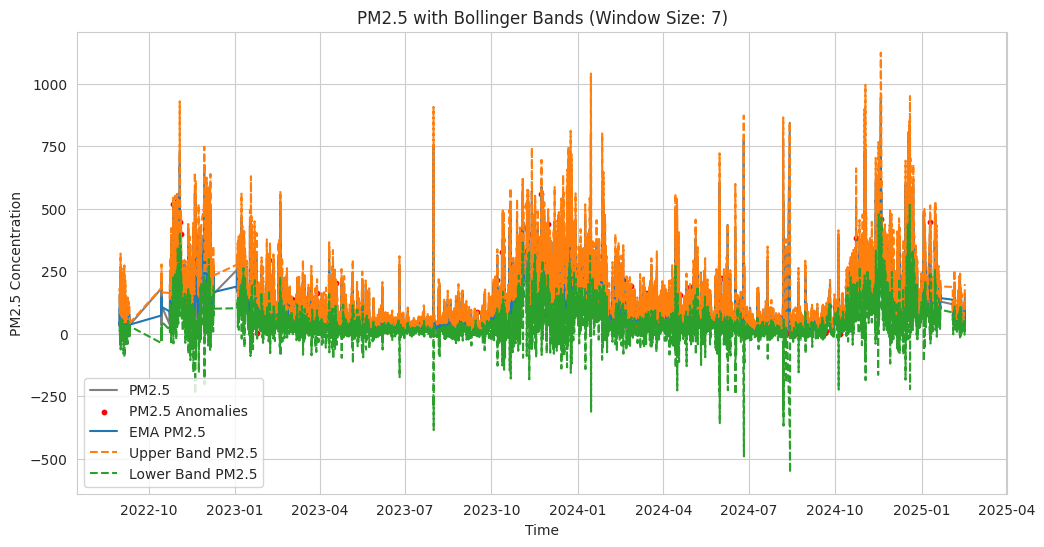

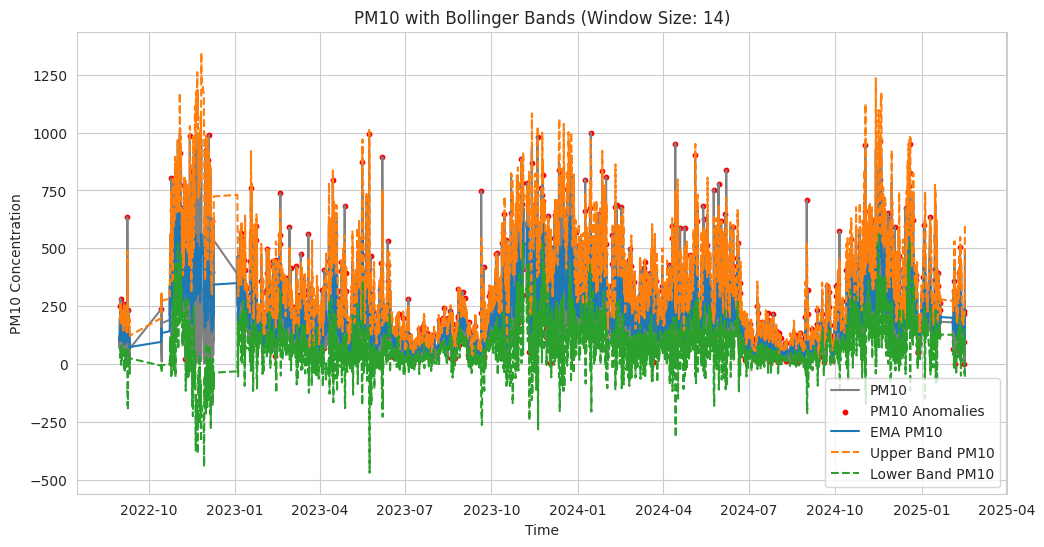

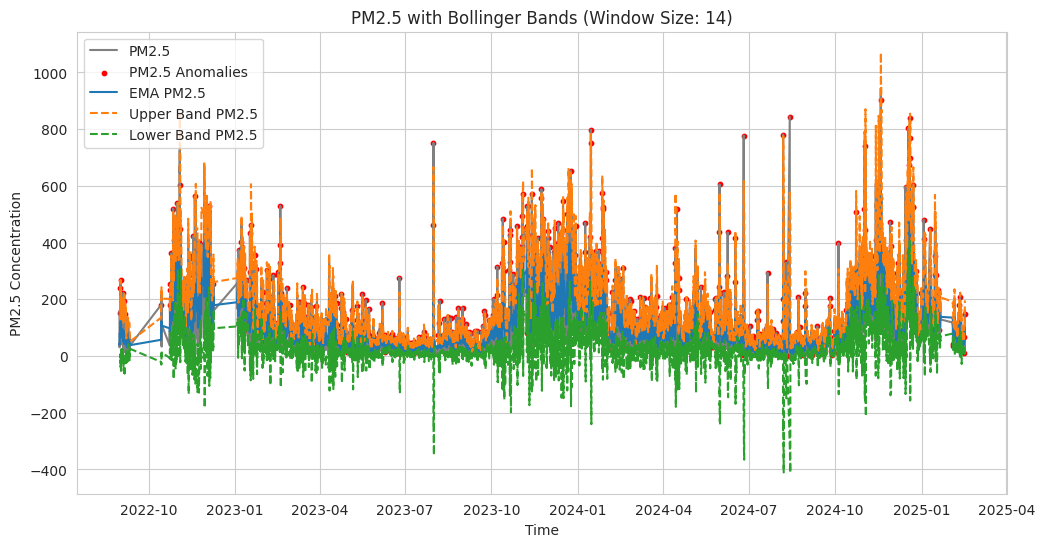

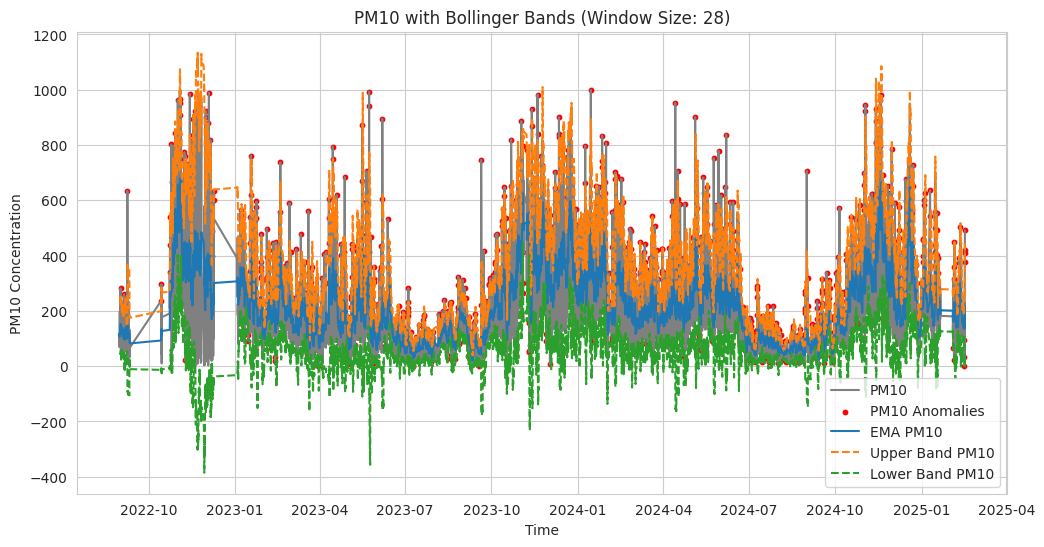

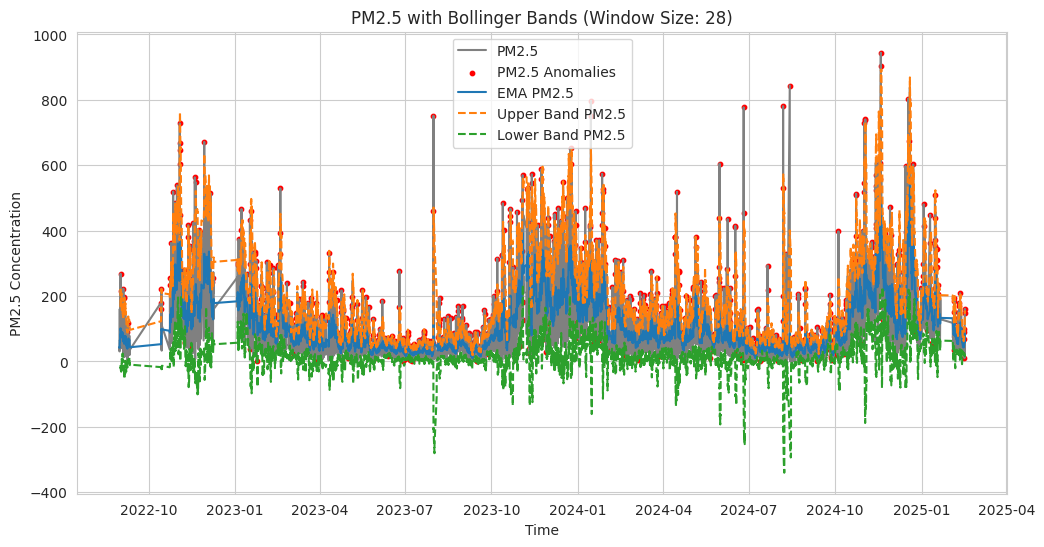

In [42]:
# prompt: plot graphs (matrix 4*2 4 differnt window sizes), highting only the outliers in red

import matplotlib.pyplot as plt

def plot_anomalies_with_window(df, window_size):
    # ... (Your existing code to calculate EMA, Bollinger Bands, and anomalies)

    plt.figure(figsize=(12, 6))
    plt.plot(df['dt_time'], df['pm10cnc'], label='PM10', color='grey')
    plt.scatter(df['dt_time'][df['Anomaly_Bollinger_pm10']], df['pm10cnc'][df['Anomaly_Bollinger_pm10']], color='red', label='PM10 Anomalies', s=10) # Highlight anomalies
    plt.plot(df['dt_time'], df['EMA_pm10'], label='EMA PM10')
    plt.plot(df['dt_time'], df['Upper_Band_pm10'], label='Upper Band PM10', linestyle='--')
    plt.plot(df['dt_time'], df['Lower_Band_pm10'], label='Lower Band PM10', linestyle='--')

    plt.title(f'PM10 with Bollinger Bands (Window Size: {window_size})')
    plt.xlabel('Time')
    plt.ylabel('PM10 Concentration')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df['dt_time'], df['pm2.5cnc'], label='PM2.5', color='grey')
    plt.scatter(df['dt_time'][df['Anomaly_Bollinger_pm25']], df['pm2.5cnc'][df['Anomaly_Bollinger_pm25']], color='red', label='PM2.5 Anomalies', s=10) # Highlight anomalies
    plt.plot(df['dt_time'], df['EMA_pm25'], label='EMA PM2.5')
    plt.plot(df['dt_time'], df['Upper_Band_pm25'], label='Upper Band PM2.5', linestyle='--')
    plt.plot(df['dt_time'], df['Lower_Band_pm25'], label='Lower Band PM2.5', linestyle='--')

    plt.title(f'PM2.5 with Bollinger Bands (Window Size: {window_size})')
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Concentration')
    plt.legend()
    plt.show()


# Example usage for multiple window sizes (adjust as needed)
window_sizes = [3, 7, 14, 28]

for window_size in window_sizes:
    # Create a copy of the original DataFrame to avoid modifying the original
    temp_df = df.copy()

    # Call your existing analysis_window_sizes function
    # to calculate the data for the specific window size.
    analysis_results = analyze_window_sizes(temp_df, [window_size])

    # Then call the plotting function
    plot_anomalies_with_window(temp_df, window_size)


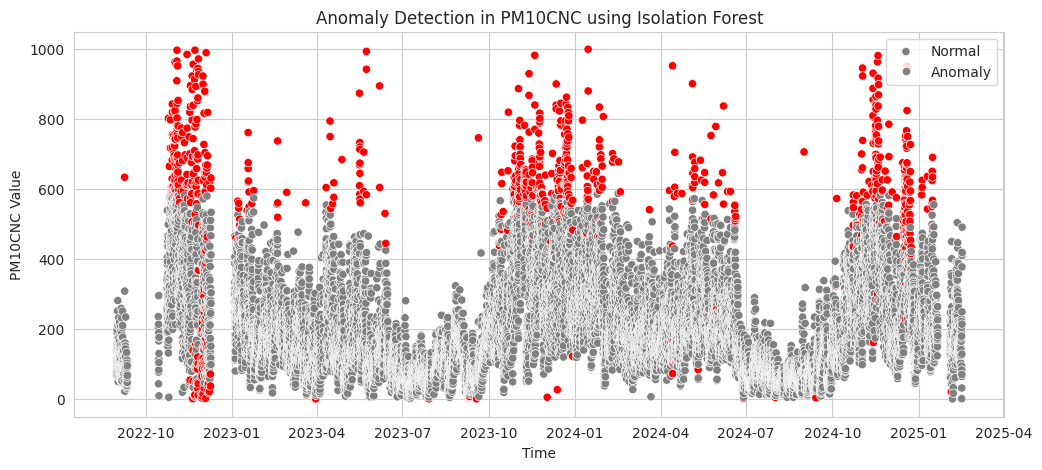

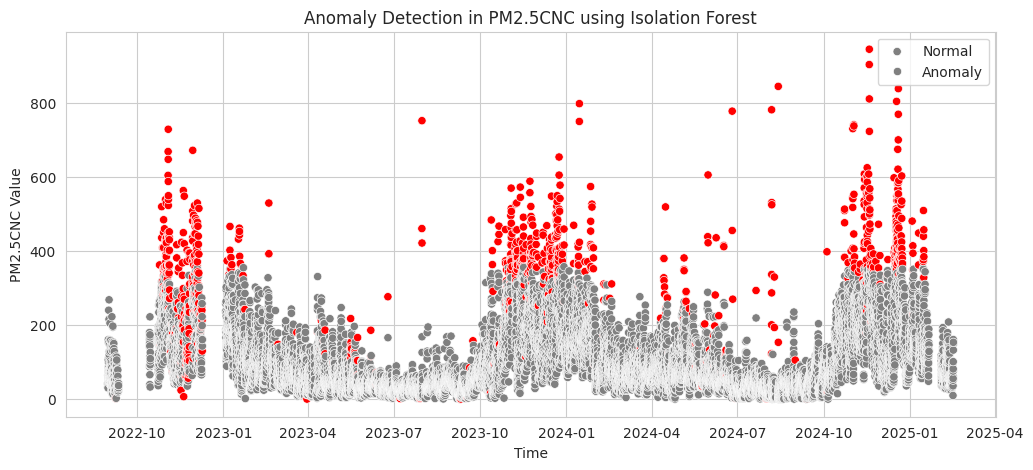

✅ Isolation Forest Accuracy: 95.00%
🔴 Isolation Forest Number of Anomalies: 910


In [44]:
# prompt: repaet the sam eusing isolation forest, show only the outliers with red

from sklearn.ensemble import IsolationForest

# ... (Your existing code)

# 📌 Select features for Isolation Forest
X = df[["pm10cnc", "pm2.5cnc"]]

# 📌 Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.05) # Adjust contamination as needed
model.fit(X)

# 📌 Predict anomalies
df['Anomaly_IForest'] = model.predict(X)

# 📌 Convert predictions to boolean (1: inlier, -1: outlier)
df['Anomaly_IForest'] = df['Anomaly_IForest'] == -1


# 📌 Plot anomalies detected by Isolation Forest
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm10cnc"], hue=df["Anomaly_IForest"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM10CNC using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("PM10CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["dt_time"], y=df["pm2.5cnc"], hue=df["Anomaly_IForest"], palette={False: "grey", True: "red"})
plt.title("Anomaly Detection in PM2.5CNC using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("PM2.5CNC Value")
plt.legend(["Normal", "Anomaly"])
plt.show()

# 📌 Calculate Accuracy and Number of Anomalies for Isolation Forest
normal_count_iforest = len(df[df["Anomaly_IForest"] == False])
anomaly_count_iforest = len(df[df["Anomaly_IForest"] == True])

accuracy_iforest = normal_count_iforest / len(df) * 100
print(f"✅ Isolation Forest Accuracy: {accuracy_iforest:.2f}%")
print(f"🔴 Isolation Forest Number of Anomalies: {anomaly_count_iforest}")
